# PROJECT RISK
## Estimating optimal decisions in the board game of Risk using Monte Carlo simulation, aggregation of outcomes and Pareto optimization

## Abstract
The pastime of board games is a common practice in the Swedish household. The interactive nature of the game and wholesome spirit of competition makes it an ideal activity for the whole of the family to enjoy. But as friends and family are temporarily turned into foes, bonds of kinship are severed and buried hatchets see the light of day yet again. In this project we analyze the board game of Risk wherein participants use their troops to attain and retain territories on the game board. Players decide strategies for waging battle and outcomes are decided by throwing dice. Hence the game is equally a game of probability as a game of informed decisions. To estimate optimal decisions for achieving a given task we use Monte Carlo simulations to estimate probability distributions (PDF) then aggregate outcomes in the form of event chains and finally we use Pareto optimization for selection of optimal decisions. All programs are made in Python.

## Introduction 
For a sore loser there is no such thing as a relaxing family game night; and for games such as Monopoly, Risk or those akin, losses become severe enough to ruin the night. Whilst cheating is not an option, attempting to memorize all answers from a historical quiz the night prior, or to calculate the optimal strategy of a probabilistic game beforehand, are surely within the realm of adequate sportsmanship. However, when faced with a game like Risk where options are innumerable and strategies complex, calculating all possibilities explicitly becomes unfeasible. Thus, it becomes imperative to find a method for estimating optimal moves on the field of battle. Although the probabilities of single interactions between troops are known, probabilities of specific outcomes of battles on graphs become increasingly difficult to calculate explicitly due to the numerous ways to achieve a single result and due to the number of ways to setup battle on a graph. Naturally, larger graphs present exponentially larger difficulties.

### Purpose and goal
The purpose of this project is to create a theoretical concept for how to estimate optimal moves when explicitly calculating probabilities become too complex. The goal is to demonstrate the concept by presenting the optimal solutions to the problem of conquering a subgraph on the game board.

### How to use
- To run all programs an additional package is needed (networkx). Complete environment is provided in this link: INSERT LINK.
- All data necessary to run this notebook is included in the repository. In case of missing data, simply execute the program "Load_Data.ipynb".

## Method
All of the programs are made with Pyhton 3.0. The core of the concept is to view the game board as a connected, undirected graph where nodes represent territories and edges connections between them, represented in the form of an adjacency matrix. A "node ownership" dictionary and a "node troops" dictionary holds information of current ownership status of the territories and number of troops on each node respectively. The adjacency graph along with the two dictionaries are nested in another dictionary called the "game status" dictionary. 

### Description of techniques used
#### Monte Carlo simulation
Monte Carlo simulation is a technique to simulate a sequence of events by sampling from a known PDF. By performing a large number of simulations and analyzing the outcomes, the PDFs of more complex events can be estimated.

#### Aggregation of outcomes
This simply refers to the fact that for two independent events $A$ and $B$, the probability $P(A \cap B) = P(A)P(B)$. Hence the probability of a sequence of independent events $X_1, X_2,...,X_n$ is $\prod_{i=1}^{n}P(X_i)$.

#### Pareto optimization
Pareto efficiency is a concept in multi-objective optimization. A solution is considered Pareto optimal if no other solution exists such that increasing one metric does not decrease another. 

The process is then divided into three steps.

### Simulations on generic graphs
In the first part we generate smaller graphs with 1 enemy (player2) node and between 1 to 3 friendly (player1) nodes which we populate with all possible combinations of troop numbers between 1 and 4. The graphs in this set are all unique with respect to graph type and node troops numbers. They are generic in the sense that all enemy nodes have node number 0 and friendly nodes range from 1 to 4. 

We then use a Monte Carlo simulation approach to simulate 1000 battles on each generic graph. Outcomes are decided at random by sampling from the PDFs pertaining to the specific conditions on the graph. Attacks are always carried out with full force, graphs with multiple friendly nodes always attack from the strongest, all battles resume until player1 wins or lack available moves. If player1 is victorious all troops but one are transferred from the attacking node to the conquered. Below we show an example dataframe resulting from simulations on a graph where player1 and 2 have one node each. The columns contain information about graph type, sequential states and success status.

In [98]:
example_result = pd.read_csv('M1_simulation_results.csv')
example_result

,Matrix,Initial State,Final State,New State,Successful
0,M1,"{0: [2, 1], 1: [1, 1]}","{0: [2, 1], 1: [1, 1]}","{0: [2, 1], 1: [1, 1]}",0
1,M1,"{0: [2, 1], 1: [1, 1]}","{0: [2, 1], 1: [1, 1]}","{0: [2, 1], 1: [1, 1]}",0
2,M1,"{0: [2, 1], 1: [1, 1]}","{0: [2, 1], 1: [1, 1]}","{0: [2, 1], 1: [1, 1]}",0
3,M1,"{0: [2, 1], 1: [1, 1]}","{0: [2, 1], 1: [1, 1]}","{0: [2, 1], 1: [1, 1]}",0
4,M1,"{0: [2, 1], 1: [1, 1]}","{0: [2, 1], 1: [1, 1]}","{0: [2, 1], 1: [1, 1]}",0
...,...,...,...,...,...
15995,M1,"{0: [2, 4], 1: [1, 4]}","{0: [1, 0], 1: [1, 3]}","{0: [1, 2], 1: [1, 1]}",1
15996,M1,"{0: [2, 4], 1: [1, 4]}","{0: [2, 2], 1: [1, 1]}","{0: [2, 2], 1: [1, 1]}",0
15997,M1,"{0: [2, 4], 1: [1, 4]}","{0: [1, 0], 1: [1, 4]}","{0: [1, 3], 1: [1, 1]}",1
15998,M1,"{0: [2, 4], 1: [1, 4]}","{0: [1, 0], 1: [1, 4]}","{0: [1, 3], 1: [1, 1]}",1


### Aggregating outcomes to form event chains
In the second step, outcomes of the 1000 battles are analyzed for each generic graph and the probability of each outcome is estimated based on relative frequency. All generic graphs with available moves constitute parent nodes for event trees with children nodes being the possible outcomes. Now, since any decision by the player is equivalent to a battle on a generic graph, these primal event trees essentially constitute the building blocks for all possible combinations of decisions and outcomes and since probabilities for all such event trees are estimated we can expand this to estimate the probabilities of outcomes in aggregated event chains. 

The process of generating event chains is the following. The initial game status is analyzed and possible options for player1 evaluated. Each option becomes a root in an event tree and all outcomes are appended as branches. For each branch the game satus dict is updated in accordance with the outcome. The expansion of an event chain is terminated when all nodes in the adjacency graph are conquered or when no valid moves are available. This process explores all possible events within the scope of the battle simulation logic under the assumption that the initial Monte Carlo simulations have captured all outcomes of battles on the generic graphs. Below we display the dataframe containing the event chains.

In [99]:
simulation_output_df = pd.read_pickle('simulation_output_df.pkl')
simulation_output_df

,depth,aggr_prob,aggr_node_path,aggr_attack_type,aggr_attacking_nodes,event_probs,final_troop_numbers,final_node_ownership,final_node_troop_numbers,termination_reason,friendly_troop_cost,enemy_troop_cost,graph_conquered
0,3,0.064031,"[3, 4, 5]","[2, 1, 1]","[(0, 1), (2,), (4,)]","[0.362, 0.402, 0.44]","{'Player1': 10, 'Player2': 6}","{0: 'Player1', 1: 'Player1', 2: 'Player1', 3: ...","{0: 1, 1: 4, 2: 1, 3: 3, 4: 1, 5: 2, 6: 2, 7: 2}",Player1 attacked but lost,2,4,False
1,4,0.028173,"[3, 4, 5, 5]","[2, 1, 1, 1]","[(0, 1), (2,), (4,), (3,)]","[0.362, 0.402, 0.44, 0.44]","{'Player1': 8, 'Player2': 6}","{0: 'Player1', 1: 'Player1', 2: 'Player1', 3: ...","{0: 1, 1: 4, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 2}",Player1 attacked but lost,4,4,False
2,4,0.028173,"[3, 4, 5, 5]","[2, 1, 1, 1]","[(0, 1), (2,), (4,), (3,)]","[0.362, 0.402, 0.44, 0.44]","{'Player1': 8, 'Player2': 6}","{0: 'Player1', 1: 'Player1', 2: 'Player1', 3: ...","{0: 1, 1: 4, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 2}",Player1 has no more available moves,4,4,False
3,4,0.017096,"[3, 4, 5, 5]","[2, 1, 1, 1]","[(0, 1), (2,), (4,), (3,)]","[0.362, 0.402, 0.44, 0.267]","{'Player1': 8, 'Player2': 6}","{0: 'Player1', 1: 'Player1', 2: 'Player1', 3: ...","{0: 1, 1: 4, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 2}",Player1 attacked but lost,4,4,False
4,4,0.017096,"[3, 4, 5, 5]","[2, 1, 1, 1]","[(0, 1), (2,), (4,), (3,)]","[0.362, 0.402, 0.44, 0.267]","{'Player1': 8, 'Player2': 6}","{0: 'Player1', 1: 'Player1', 2: 'Player1', 3: ...","{0: 1, 1: 4, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 2}",Player1 has no more available moves,4,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037988,4,0.000153,"[5, 4, 3, 6]","[1, 1, 1, 1]","[(2,), (1,), (0,), (3,)]","[0.074, 0.074, 0.189, 0.148]","{'Player1': 6, 'Player2': 4}","{0: 'Player1', 1: 'Player1', 2: 'Player1', 3: ...","{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2}",Player1 has no more available moves,6,6,False
1037989,4,0.000100,"[5, 4, 3, 6]","[1, 1, 1, 1]","[(2,), (1,), (0,), (3,)]","[0.074, 0.074, 0.189, 0.097]","{'Player1': 7, 'Player2': 2}","{0: 'Player1', 1: 'Player1', 2: 'Player1', 3: ...","{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 2}",Player1 has no more available moves,5,8,False
1037990,3,0.000745,"[5, 4, 3]","[1, 1, 1]","[(2,), (1,), (0,)]","[0.074, 0.074, 0.136]","{'Player1': 5, 'Player2': 6}","{0: 'Player1', 1: 'Player1', 2: 'Player1', 3: ...","{0: 1, 1: 1, 2: 1, 3: 2, 4: 1, 5: 1, 6: 2, 7: 2}",Player1 attacked but lost,7,4,False
1037991,3,0.000745,"[5, 4, 3]","[1, 1, 1]","[(2,), (1,), (0,)]","[0.074, 0.074, 0.136]","{'Player1': 5, 'Player2': 6}","{0: 'Player1', 1: 'Player1', 2: 'Player1', 3: ...","{0: 1, 1: 1, 2: 1, 3: 2, 4: 1, 5: 1, 6: 2, 7: 2}",Player1 has no more available moves,7,4,False


### Selecting Pareto optimal event chains
The third step pertains to finding the optimal solutions, which in our case refers to the decisions yielding optimal outcomes. Hence the first substep is to determine what constitutes an optimal outcome. Given the objective of conquering the graph we can trivially conclude that all event chains where total dominion over the graph is not a part of the outcome must be considered suboptimal. Furthermore, for successful event chains, higher probability is better than low and higher number of remaining troops in the final outcome is better than low. Decisions we can make are a) enemy node to attack and b) which nodes to attack from. 

Given the prerequisites above we start by selecting all successful event chains from the dataframe and extract all unique choices of "node paths". We then filter the original dataframe by the successful node paths to include also the unsuccessful event chains. Now we group by "node path" and "nodes to attack from", that is, our "decision variables" and aggregate on the mean probability of the chains. The mean of the "decision group" relative to the individual chain is used as weight to calculate expected number of troops for the group. All decision groups are then merged into a single dataframe with the mean success rate and expected troop numbers as metrics.

To find the optimal choice we must now consider both success rate and expected troop numbers. Unfortunately, in our case the option with the highest success rate is not the same as the one with the highest expected troop numbers. Hence, we use the Pareto optimization principle. Applying this principle to our event chains will yield a set of Pareto optimal solutions, also called the "Pareto front". Below we visualize this concept by plotting the metrics for each successful event chain and highlighting the top 10 fronts.

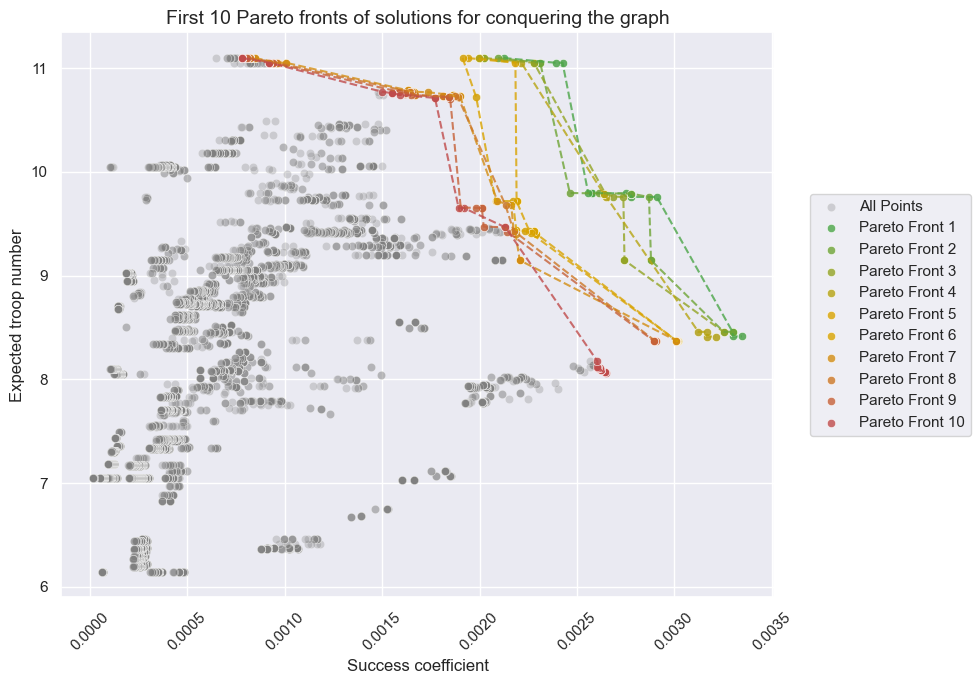

In [100]:
%run Project_Plots.ipynb
plot_multiple_pareto_fronts()

Now, since we are interested in the "optimal" solutions we of course disregard all but the first pareto front. These solutions represents the optimal decisions to make in order to conquer the given graph and thus, constitutes the end result of our project. 

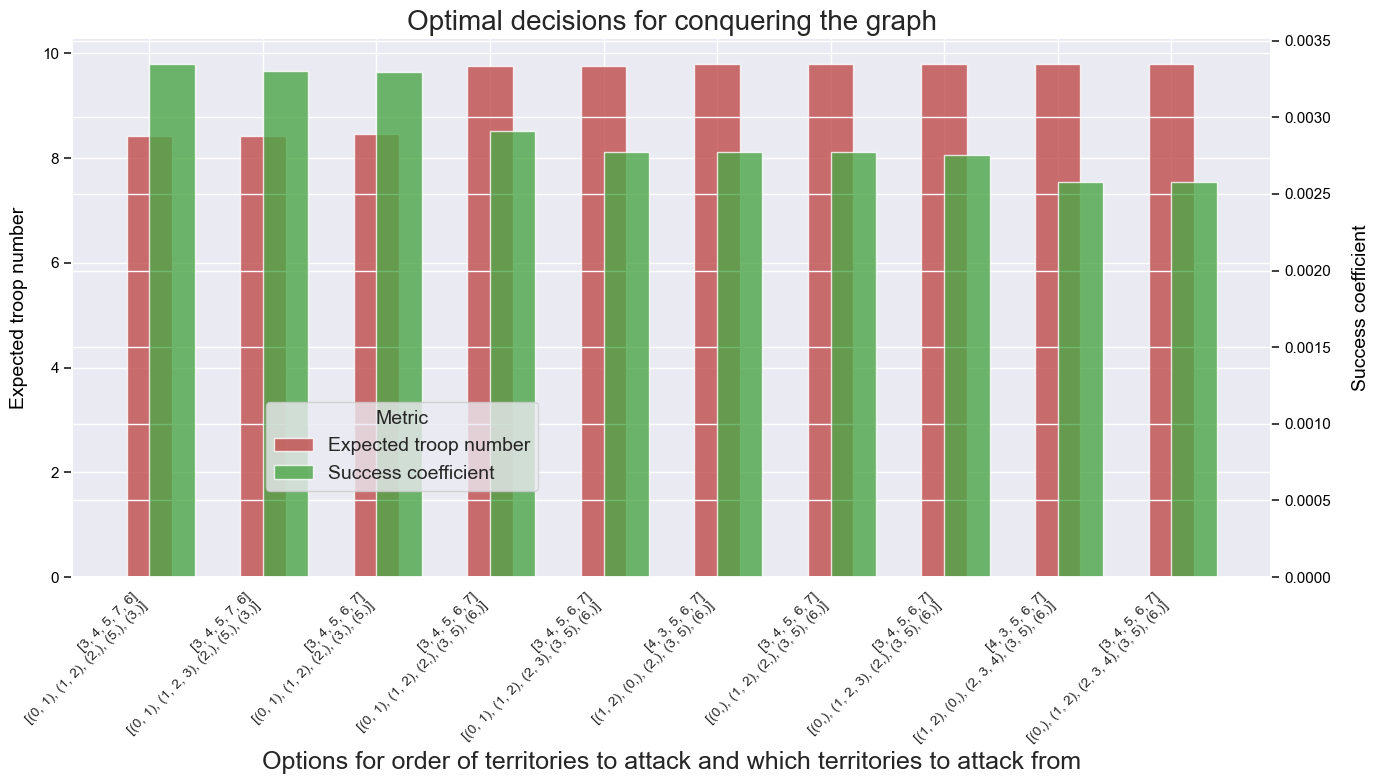

In [101]:
generate_pareto_optimal_bar_plot()

## Discussion
It is important to note that decisions that might be considered optimal in our delimited context is not neccesarily optimal with respect to the higher order strategy of the game total. 